Hierarchical Clusterinng


In [ ]:
!pip install category_encoders fastcluster

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
import plotly.graph_objs as go
import plotly.express as px
from sklearn.metrics import silhouette_score
import fastcluster
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster

Importing Data Set 

In [ ]:
data_hc= pd.read_csv('/content/European_bank_marketing.csv')
data_hc

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term_deposit,Ethnicity_African
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,0


In [ ]:
# Identify categorical features (including binary columns)
cat_cols = [col for col in data_hc.columns if pd.api.types.is_categorical_dtype(data_hc[col]) or pd.api.types.is_object_dtype(data_hc[col]) or (data_hc[col].nunique() == 2)]
# Identify numerical features
num_cols = [col for col in data_hc.columns if col not in cat_cols]

In [ ]:
def apply_categorical_encodings(df, threshold=3):
  for col in df.columns:
    if pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(df[col]):
      unique_values = df[col].nunique()
      if unique_values <= threshold:
        one_hot_encoder = OneHotEncoder(sparse_output=False)
        encoded_col = pd.DataFrame(one_hot_encoder.fit_transform(df[[col]]))
        encoded_col.columns = [f'{col}_{val}' for val in one_hot_encoder.categories_[0]]
        df = pd.concat([df, encoded_col], axis=1)
      else:
        target_encoder = TargetEncoder()
        df[col] = target_encoder.fit_transform(df[col], df['term_deposit'])
      df.drop(col, axis=1, inplace=True)
  return df

In [ ]:
def hierarchical_clustering(X, cat_threshold):
    # Identify categorical features (including binary columns)
    cat_cols = [col for col in X.columns if pd.api.types.is_categorical_dtype(X[col]) or pd.api.types.is_object_dtype(X[col]) or (X[col].nunique() == 2)]
    # Identify numerical features
    num_cols = [col for col in X.columns if col not in cat_cols]

    # Apply categorical encodings to categorical features
    X = apply_categorical_encodings(X, cat_threshold)

    # Scale numerical features
    scaler = StandardScaler()
    X[num_cols] = scaler.fit_transform(X[num_cols])

    # Drop term deposit
    X.drop('term_deposit',axis = 1, inplace= True)
    return X

In [ ]:
a=apply_categorical_encodings(df=data_hc,threshold=3)

In [ ]:
a

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
b= hierarchical_clustering(X=a,cat_threshold=3)

In [ ]:
b

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0.292025,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
41184,0.573445,0.481012,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
41185,1.533034,-0.267225,-0.204909,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
41186,0.381527,0.708569,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
c=b.iloc[:,1:25].values

Using dendogram to identify optimal number of clustering

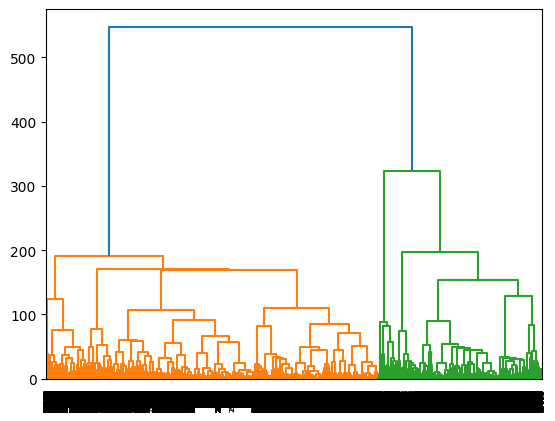

In [ ]:



# Compute the pairwise distances between the samples
D = fastcluster.linkage_vector(c, method='ward', metric='euclidean')

# Plot a dendrogram of the hierarchical clustering
dendrogram(D)

# Show the plot
plt.show()

Training Hierarchical Clustering on the dataset

> Indented block



In [ ]:
threshold = 330.0
labels = fcluster(D, t=threshold, criterion='distance')
print(labels)


[1 1 1 ... 2 2 2]
